In [1]:
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer
from IPython.core.display import display

breast_cancer = load_breast_cancer()
X = breast_cancer.data[:,:10]
y = breast_cancer.target

columns =  ['半径', 'テクスチャ', '周囲の長さ', '面積', 'なめらかさ', 'コンパクト性', 'へこみ', 'へこみの数', '対称性', 'フラクタル次元']
df = DataFrame(data=X[:,:10], columns=columns)
df['目的変数'] = y
display(df.head())

,半径,テクスチャ,周囲の長さ,面積,なめらかさ,コンパクト性,へこみ,へこみの数,対称性,フラクタル次元,目的変数
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [2]:
X = df[['面積', 'へこみ']].values
y = df['目的変数'].values

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# テストデータと訓練データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

sc = StandardScaler()
# 訓練データの平均と標準偏差を計算
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
print('平均値:',sc.mean_)

平均値: [6.59770854e+02 8.80707764e-02]


In [5]:
# 訓練データの標準化
X_train_std = sc.transform(X_train)
# テストデータを訓練データで標準化を行う
X_test_std = sc.transform(X_test)

In [6]:
# 標準化後の訓練データの平均値（ほぼ0）
train_mean = X_train_std.mean(axis=0)
print('平均値:', train_mean)
# 標準化後の訓練データの標準偏差
train_std = X_train_std.std(axis=0)
print('標準偏差:', train_std)

平均値: [2.23160407e-16 5.20521649e-16]
標準偏差: [1. 1.]


### 学習

In [7]:
# scikit-learn から多層パーセプトロンの実装である MLPClassifier を import
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(6,2), activation='relu', solver='sgd', learning_rate_init=0.01, alpha=0.0001, max_iter=1000, random_state=42)
'''
1つ目の中間層のユニットを6、2つ目の中間層のユニットを2としています（hidden_layer_sizes=(6, 2)）。
中間層の活性化関数にはデフォルト値の ReLU 関数を指定してします（activation='relu'）。
solver に 'sgd' を指定して、確率的勾配降下法による学習を指定しました。
学習率は 0.01 で、正則化パラメータは 0.0001 です。
'''

"\n1つ目の中間層のユニットを6、2つ目の中間層のユニットを2としています（hidden_layer_sizes=(6, 2)）。\n中間層の活性化関数にはデフォルト値の ReLU 関数を指定してします（activation='relu'）。\nsolver に 'sgd' を指定して、確率的勾配降下法による学習を指定しました。\n学習率は 0.01 で、正則化パラメータは 0.0001 です。\n"

In [8]:
mlp.fit(X_train_std, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 2), learning_rate='constant',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### 予測

In [9]:
# テストデータの予測
pred = mlp.predict(X_test_std)
# 予測の確認
print(pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [10]:
# 確率の確認
proba = mlp.predict_proba(X_test_std)
proba[:5]

array([[0.13981659, 0.86018341],
       [0.99417541, 0.00582459],
       [0.92114809, 0.07885191],
       [0.11387077, 0.88612923],
       [0.04589929, 0.95410071]])

### 評価

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9298245614035088

### 決定領域のプロット

In [12]:
import numpy
from matplotlib import pyplot
import japanize_matplotlib
from mlxtend.plotting import plot_decision_regions

# データの制限
N = 100

# vstack、hstack は、配列を縦（vstack）、または横（hstack）に連結
sampled_X = numpy.vstack((X_train_std[:N], X_test_std[:N]))
sampled_y = numpy.hstack((y_train[:N], y_test[:N]))

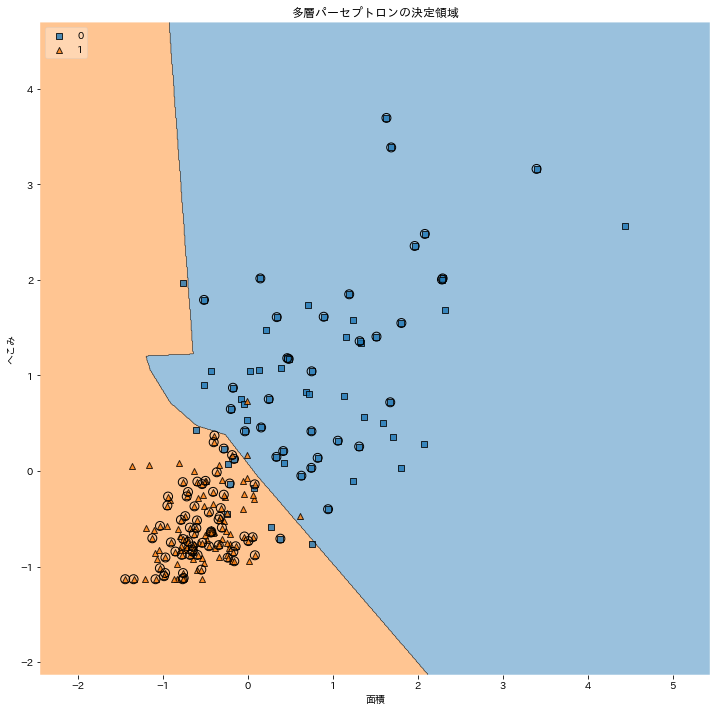

In [13]:
pyplot.figure(figsize=(12, 12))
pyplot.xlabel('面積')
pyplot.ylabel('へこみ')
pyplot.title('多層パーセプトロンの決定領域')

# 決定領域のプロット
plot_decision_regions(sampled_X, sampled_y, clf=mlp, legend=2, X_highlight=X_test_std[:N])